In [1]:
import pandas
import numpy
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from datetime import datetime

start_date = ''
end_date = ''
zone_id = 2

In [2]:
def remove_comma(df: pandas.DataFrame):
    for column in df.columns:
        df[column].replace(regex=True, inplace=True, to_replace=r',', value='')

def preprocess_data(df_ld):
    df_ld.drop(['zone_id', 'year', 'month', 'day'], axis=1, inplace=True)
    df_ld.dropna(axis=0, how='any', inplace=True)
    df_ld.reset_index(drop=True, inplace=True)
    remove_comma(df_ld)
    df_ld = df_ld.apply(pandas.to_numeric)
    return df_ld

def scale_data(data):
    temp_data = data.copy()
    scaler = MinMaxScaler()
    temp_data[temp_data.columns] = scaler.fit_transform(temp_data[temp_data.columns])
    return temp_data

In [10]:
def get_raw_load_data():
    load_data = pandas.read_csv('data/Load_history.csv')
    return load_data

def get_preprocessed_load_data(zone_id):
    raw_load_data = get_raw_load_data()
    zone_load_data = raw_load_data[raw_load_data.zone_id==zone_id]
    preprocessed_load_data = preprocess_data(zone_load_data)
    preprocessed_load_data = scale_data(preprocessed_load_data)
    return preprocessed_load_data

def get_preprocessed_load_data_with_date(zone_id):
    raw_data = get_raw_load_data()
    load_data_with_date = raw_data.copy()
    date_str = raw_data['year'].map(str) + '-' + raw_data['month'].map(str)+ '-' + raw_data['day'].map(str)
    preprocessed_load_data_with_date = preprocess_data(load_data_with_date)
    scaled_preprocessed_load_data_with_date = scale_data(preprocessed_load_data_with_date)
    scaled_preprocessed_load_data_with_date['date'] = date_str
    return scaled_preprocessed_load_data_with_date

def test():
    display(get_preprocessed_load_data(2).head())
    display(get_preprocessed_load_data_with_date(2).head())

test()

/home/prakash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/prakash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/prakash/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,0.221266,0.219850,0.186506,0.170497,0.160749,0.150130,0.162803,0.129262,0.120255,0.095827,...,0.075339,0.076719,0.114385,0.216612,0.189328,0.146030,0.157568,0.163499,0.232995,0.224448
1,0.205789,0.214408,0.202763,0.201963,0.199144,0.229362,0.269147,0.265989,0.278140,0.302682,...,0.235620,0.211726,0.235433,0.315594,0.277405,0.224041,0.230036,0.228281,0.290299,0.281364
2,0.242896,0.225535,0.210481,0.189078,0.188532,0.182279,0.202754,0.183489,0.185735,0.189168,...,0.116511,0.112732,0.133330,0.191508,0.158203,0.093431,0.107608,0.114610,0.190136,0.176860
3,0.124767,0.121558,0.099530,0.083431,0.077722,0.058939,0.081466,0.073655,0.073429,0.085973,...,0.135537,0.152676,0.193854,0.249130,0.215477,0.161918,0.177099,0.188933,0.246600,0.233211
4,0.216590,0.222014,0.214190,0.226245,0.230103,0.286433,0.389441,0.369527,0.342099,0.327813,...,0.320728,0.323685,0.343889,0.428645,0.415903,0.379193,0.376660,0.376489,0.416388,0.394626


,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h16,h17,h18,h19,h20,h21,h22,h23,h24,date
0,0.038537,0.036486,0.035485,0.034864,0.033646,0.032903,0.034368,0.035969,0.036840,0.038150,...,0.031504,0.033231,0.039381,0.037750,0.040535,0.038946,0.037556,0.037210,0.034245,2004-1-1
1,0.032340,0.031113,0.030118,0.029937,0.029418,0.029831,0.032935,0.035475,0.036921,0.041122,...,0.037043,0.037251,0.041532,0.039300,0.041458,0.040080,0.039059,0.037912,0.035425,2004-1-2
2,0.032993,0.031634,0.030311,0.029094,0.029132,0.028752,0.030596,0.033817,0.036039,0.036911,...,0.032166,0.032516,0.037076,0.035350,0.036442,0.033433,0.031721,0.030654,0.028843,2004-1-3
3,0.025721,0.023042,0.021361,0.020369,0.019481,0.019020,0.020382,0.023749,0.028492,0.032084,...,0.032645,0.033306,0.038041,0.036253,0.038274,0.036118,0.033855,0.031265,0.027224,2004-1-4
4,0.024519,0.022833,0.021713,0.020795,0.020542,0.022459,0.027471,0.028356,0.026487,0.028626,...,0.034410,0.036456,0.040548,0.039073,0.042434,0.041719,0.040916,0.039153,0.037190,2004-1-5


In [ ]:
def plot_correlation_matrix(data, correlations):
    names = data.columns
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = numpy.arange(0,len(names),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

In [14]:
# window the data using your windowing function
def window_transform_series(series, window_size):
    # containers for input/output pairs
    X = []
    y = []
    for window in range(len(series) - window_size):
        X.append(series[window:window+window_size])
        y.append(series.iloc[[window + window_size]])
    true_data = []
    for elem in X:
        temp_list = []
        for column in elem.columns:
            temp_list.append(elem[column])
        true_data.append(temp_list)
    X = true_data
    X = numpy.asarray(X)
    true_data = []
    for elem in y:
        true_data.append(numpy.asarray(elem))
    y = true_data
    y = numpy.asarray(y)
    y.shape = (len(y),24)
    return X,y

window_size = 2
X,y = window_transform_series(series = get_preprocessed_load_data(zone_id=3), window_size = window_size)

/home/prakash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/prakash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/prakash/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
train_test_split = int(numpy.ceil(4*len(y)/float(5)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = numpy.asarray(numpy.reshape(X_train, (X_train.shape[0], window_size, 24)))
X_test = numpy.asarray(numpy.reshape(X_test, (X_test.shape[0], window_size, 24)))
y_train = numpy.asarray(y_train)
y_test = numpy.asarray(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1268, 2, 24) (1268, 24) (316, 2, 24) (316, 24)


In [16]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
numpy.random.seed(0)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True, dropout=0.15, recurrent_dropout=0.1))
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(24))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2, 50)             15000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1224      
Total params: 36,424
Trainable params: 36,424
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)
#model.save_weights('model_weights/best_RNN_weights.hdf5')

Epoch 1/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.0358
Epoch 2/100
1268/1268 [==============================] - 0s 201us/step - loss: 0.0158
Epoch 3/100
1268/1268 [==============================] - 0s 189us/step - loss: 0.0156

In [18]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))
testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.00535963123741
testing error = 0.00597996264696


In [20]:
def plot_per_hour_basis(predicted_output, expected_output):
    plt.figure(figsize=(24, 40))
    for i in range(24):
        plt.subplot(12, 2, i+1)
        plt.plot(expected_output[0: len(predicted_output), i])
        plt.plot(predicted_output[0: len(predicted_output), i])
        plt.title("Hour " + str(i+1) + " Average Prediction: " + str(numpy.mean(predicted_output[0: len(predicted_output), i])) + "     Average Actual: " + str(numpy.mean(expected_output[0: len(predicted_output), i])))
        plt.tight_layout()
    plt.show()

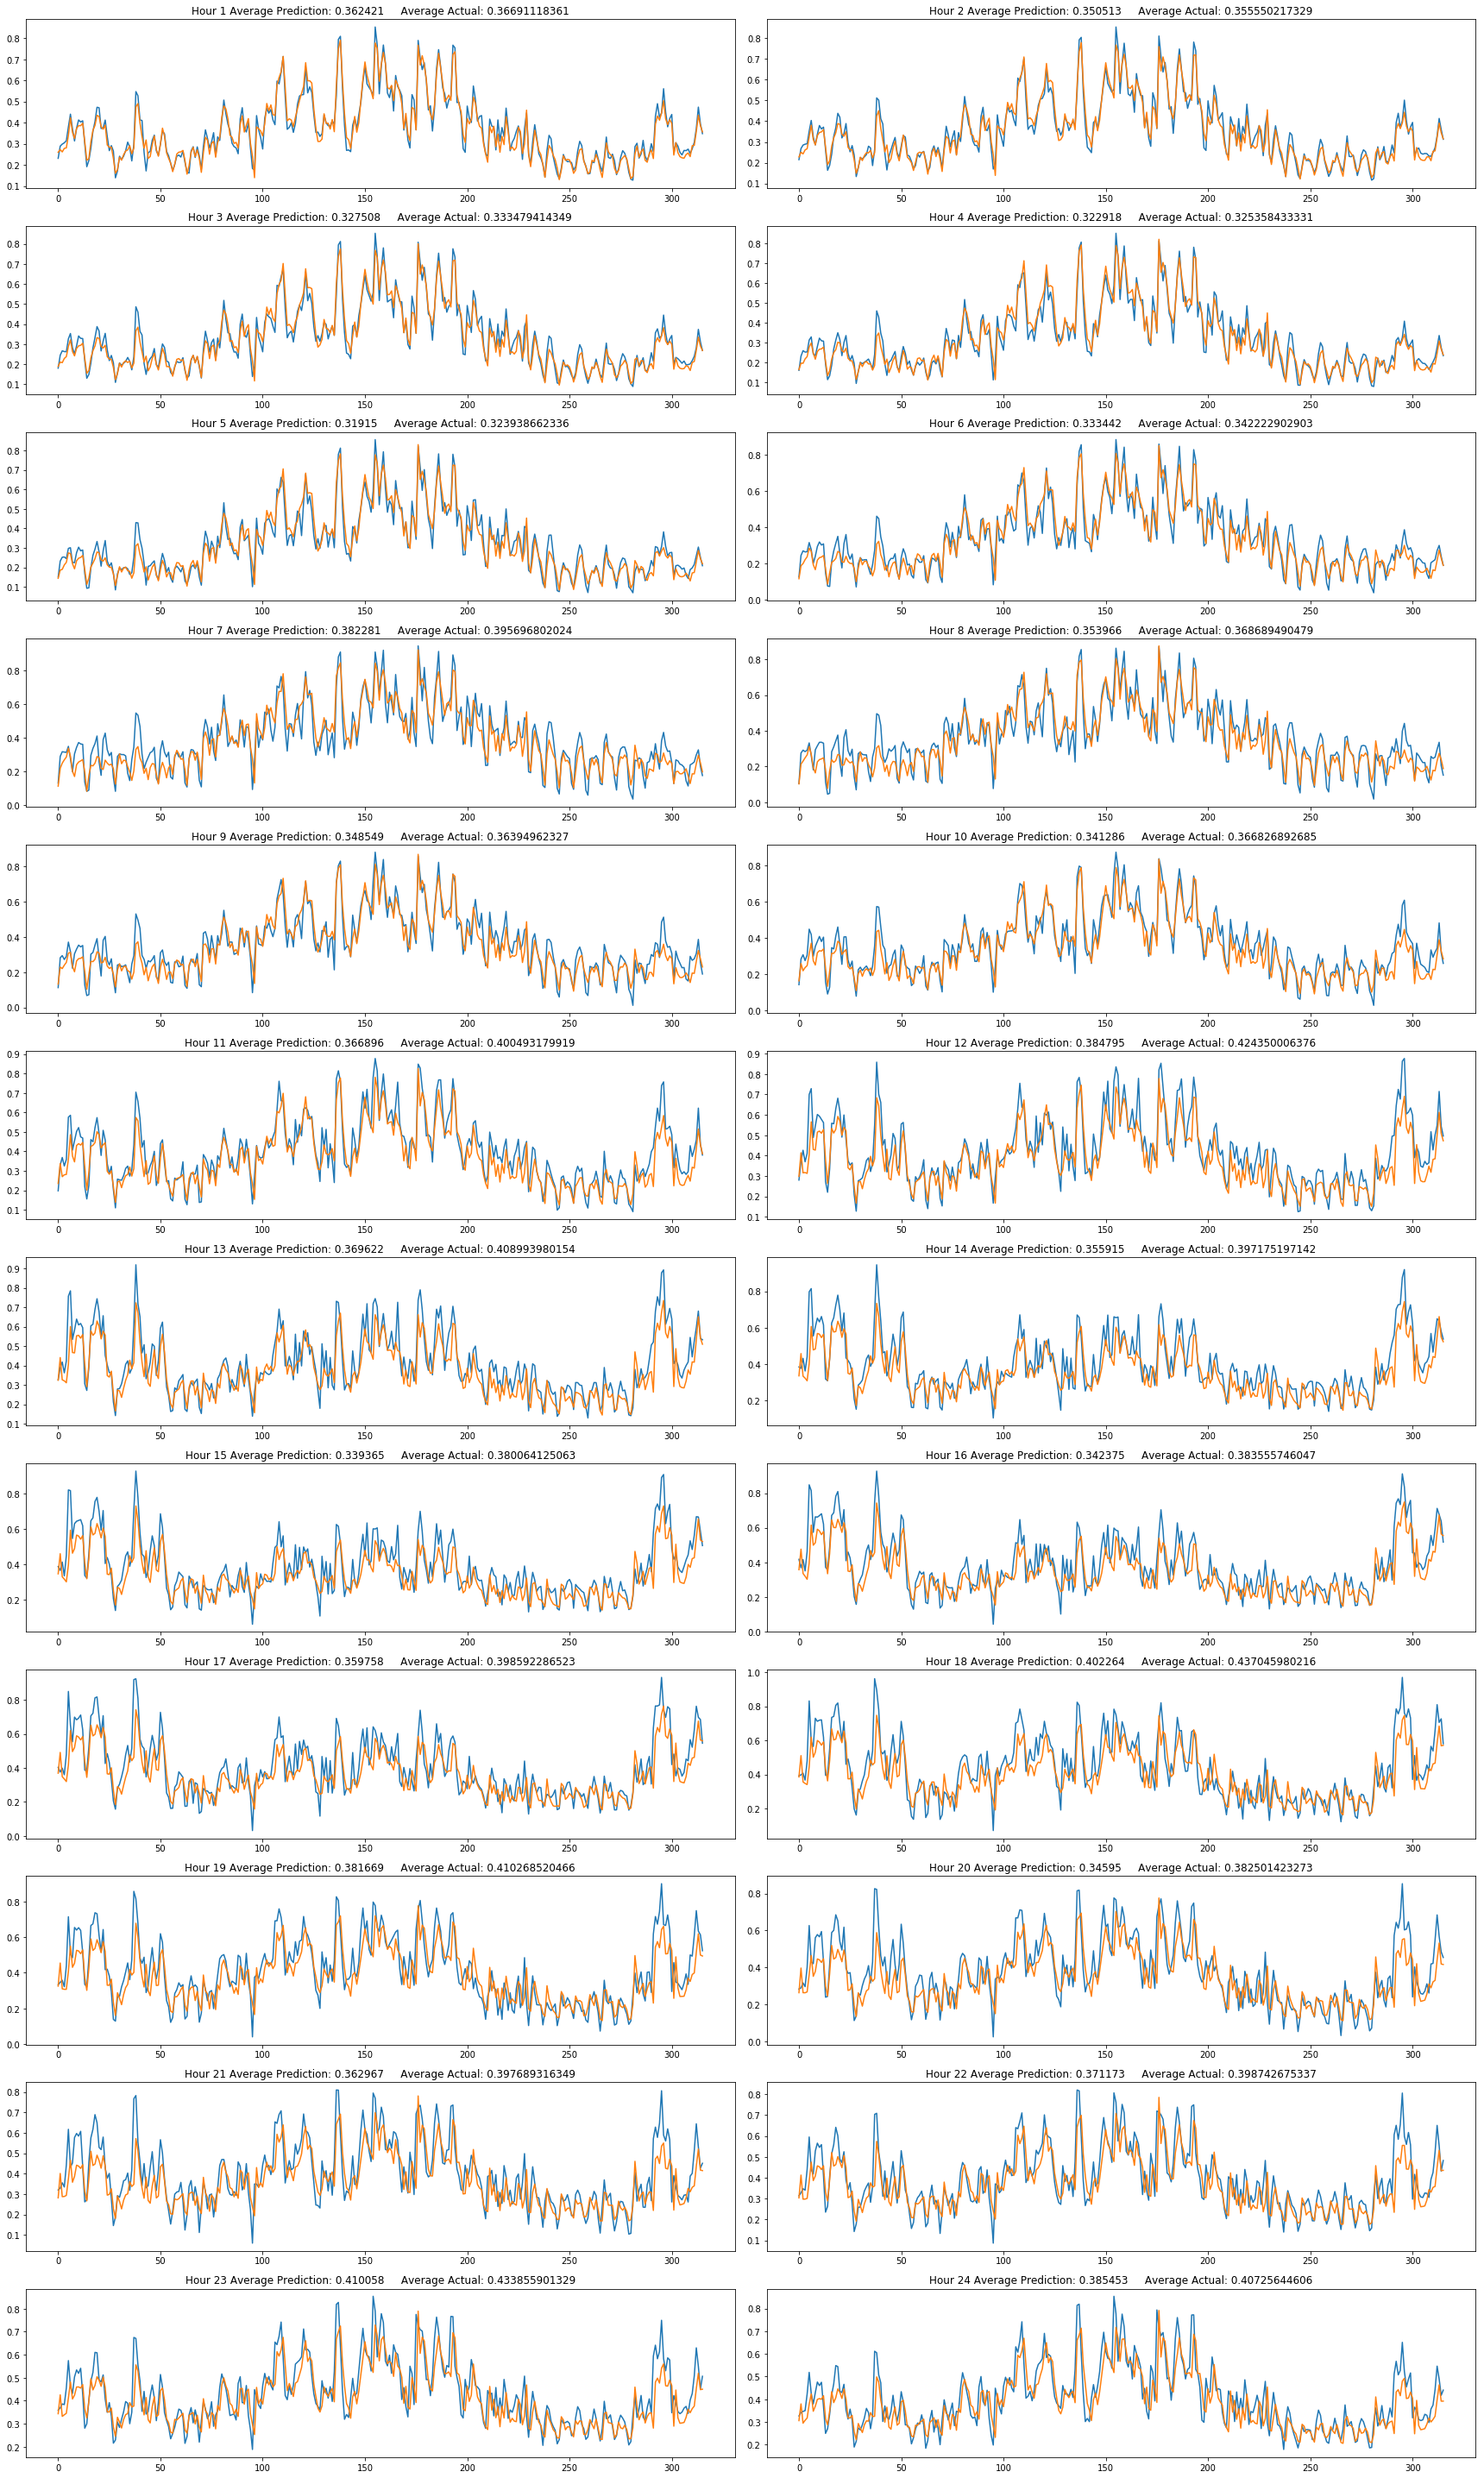

In [21]:
plot_per_hour_basis(test_predict, y_test)

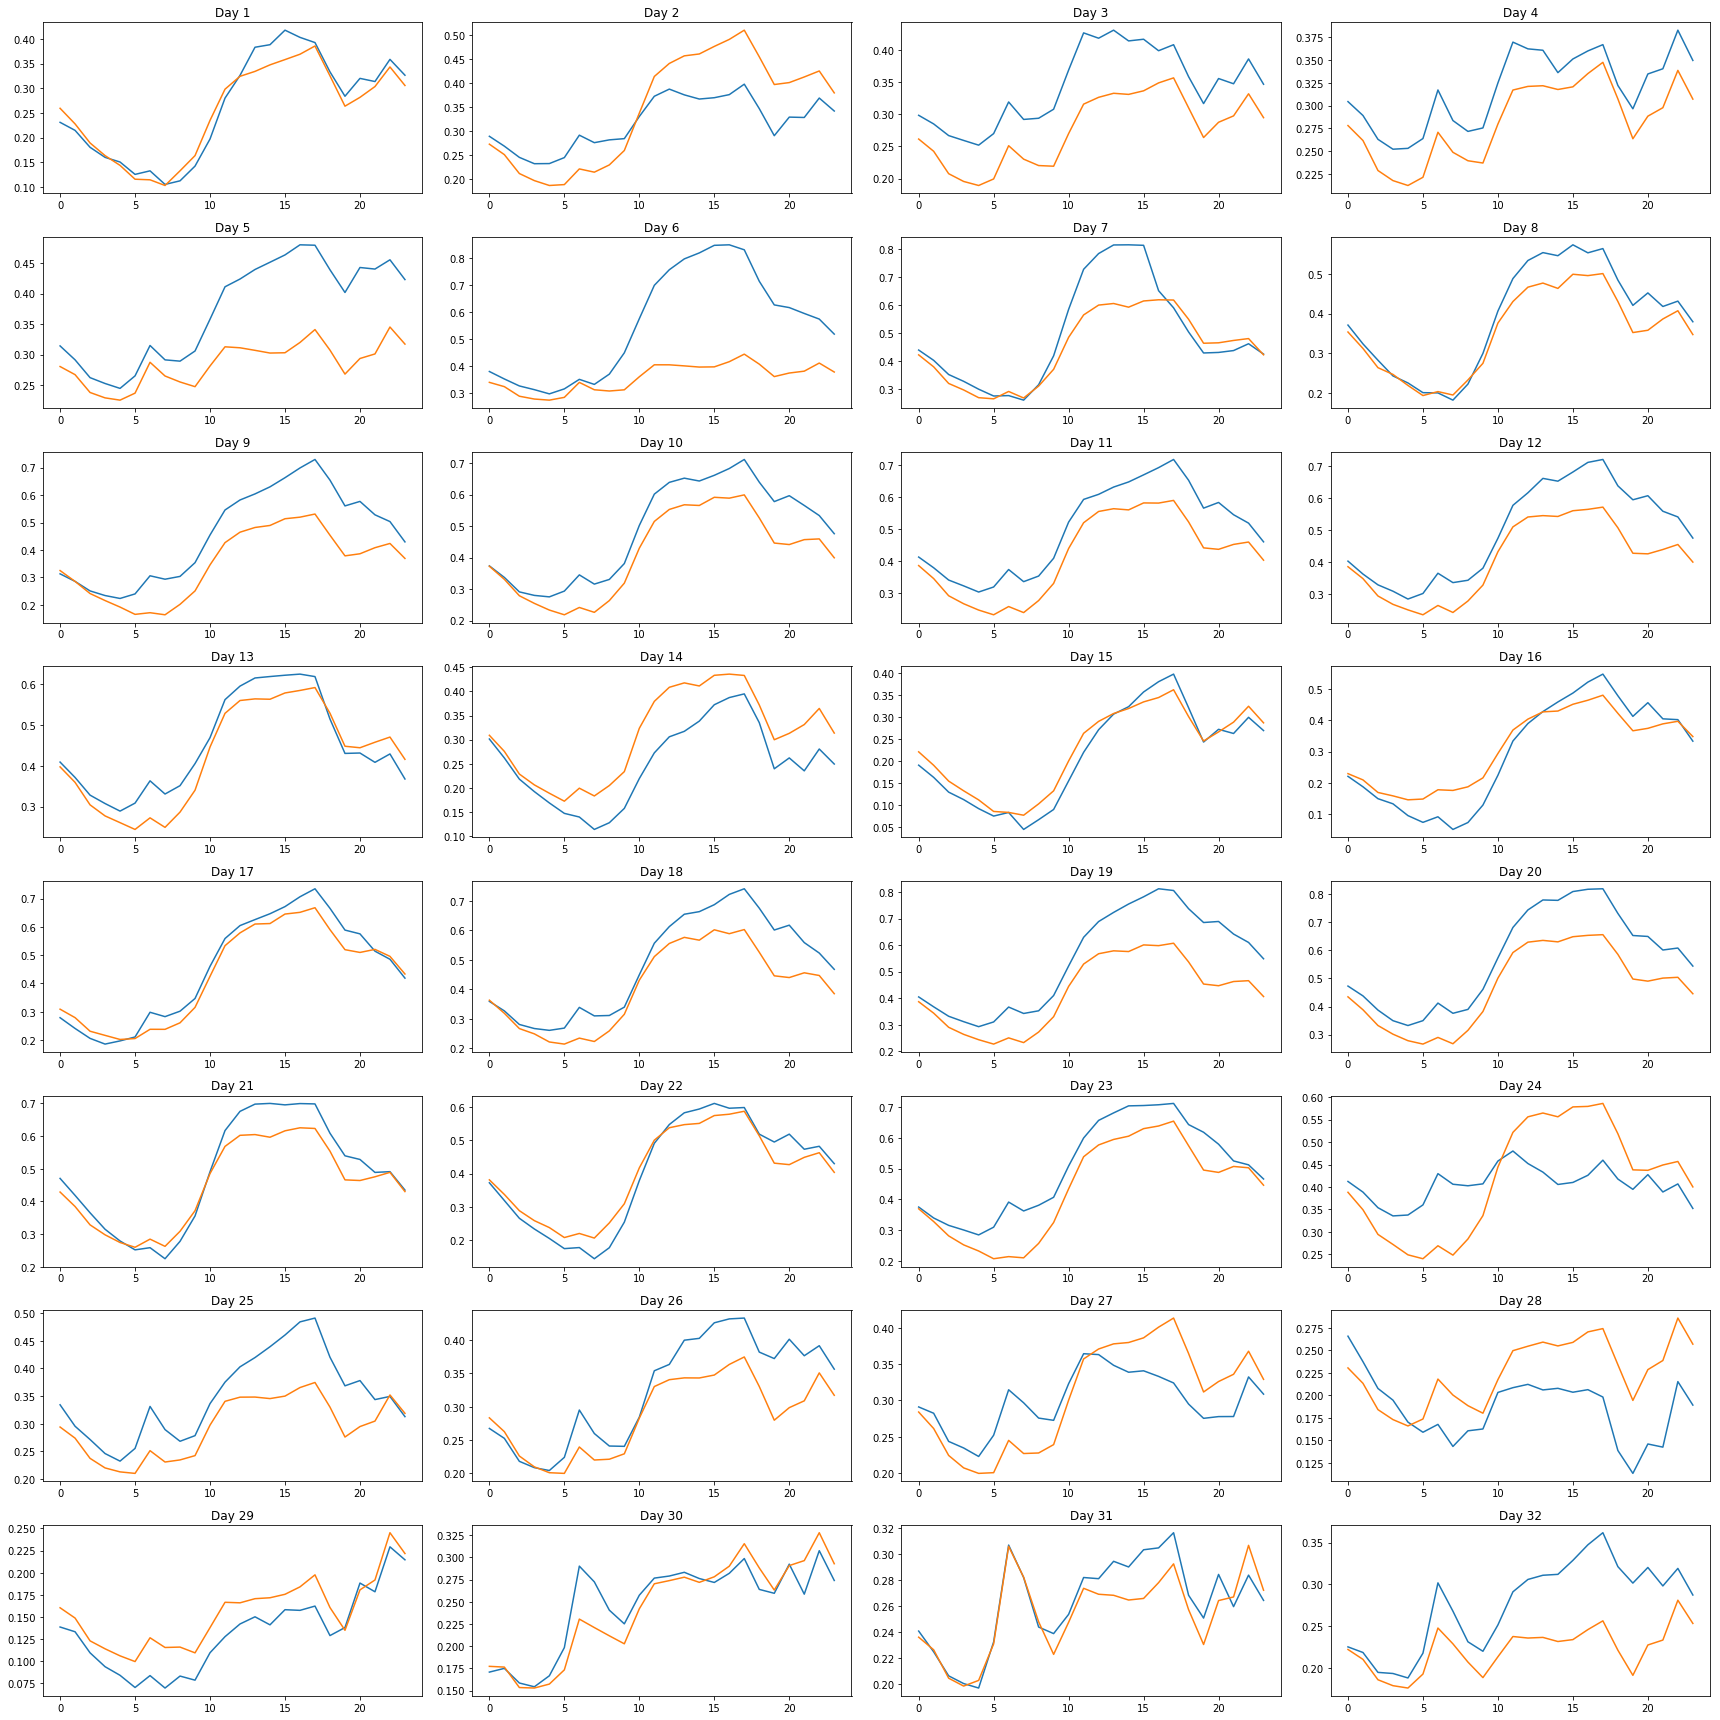

In [22]:
def plot_per_day_basis(predicted_output, expected_output):
    predicted_per_day_list = numpy.asmatrix(predicted_output).transpose()
    expected_per_day_list = numpy.asmatrix(expected_output).transpose()
    plt.figure(figsize=(24, 24))
    for i in range(32):
        plt.subplot(8, 4, i+1)
        plt.plot(expected_per_day_list[0:24, i])
        plt.plot(predicted_per_day_list[0: 24, i])
        plt.title("Day " + str(i+1))
        plt.tight_layout()
    plt.show()
plot_per_day_basis(test_predict, y_test)

In [23]:
def predict_future(model, input_data, num_days):
    output_list = []
    input_list = input_data
    predicted_data = input_data.copy()
    for _ in range(num_days):
        predicted_data = model.predict(input_list)
        input_list = numpy.delete(input_list[0], obj=0, axis=0)
        input_list = numpy.append(input_list, predicted_data, axis = 0)
        input_list = numpy.asarray(numpy.reshape(input_list, (1, window_size, 24)))
        output_list.append(predicted_data)
    return output_list

In [24]:
#model.load_weights('model_weights/best_RNN_weights.hdf5')
input_data = X_test[-1]
input_data = numpy.asarray(numpy.reshape(input_data, (1, window_size, 24)))
num_days = 7
outputs = predict_future(model, input_data, num_days)

In [25]:
def plot_future_prediction(outputs):
    i = 0
    plt.figure(figsize=(24, 24))
    for output in outputs:
        i += 1
        plt.subplot(5, 3, i)
        plt.plot(range(0, 24), output[0])
        plt.title("Day " + str(i))
        plt.tight_layout()
    plt.show()

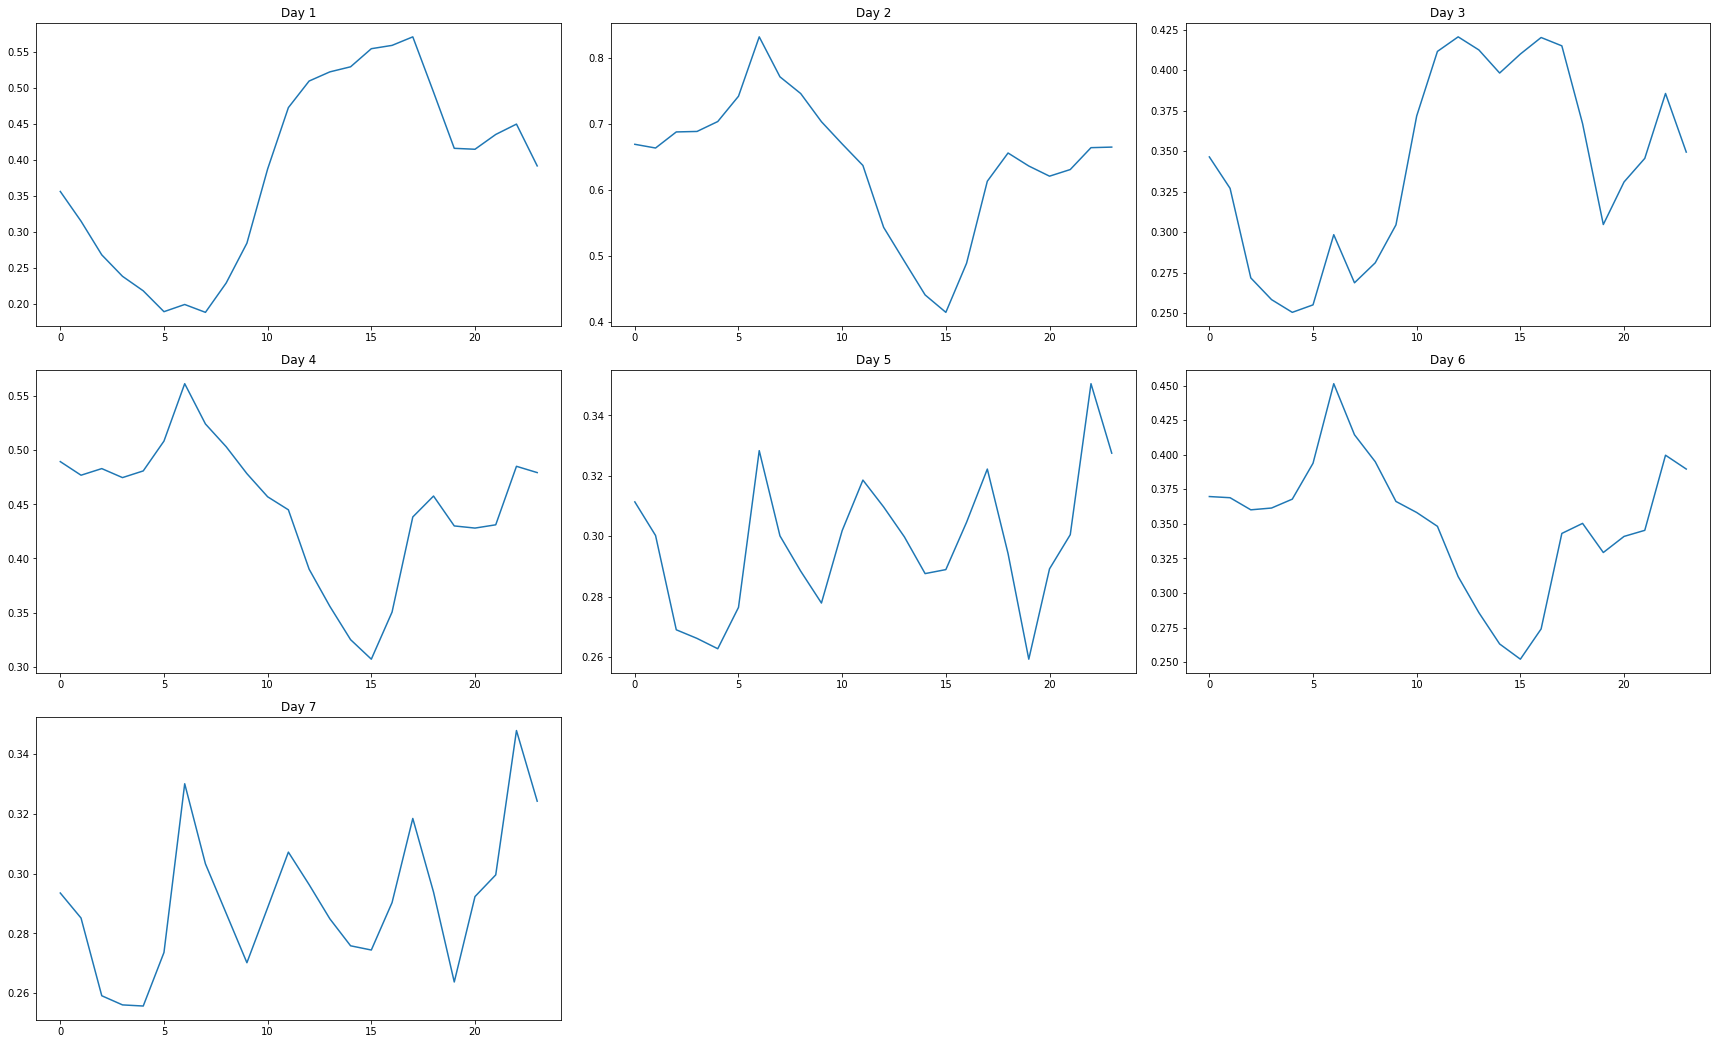

In [26]:
plot_future_prediction(outputs)

In [27]:
def get_data_between_dates(start_date, end_date):
    a = load_data_with_date[load_data_with_date['date'].apply(lambda date: datetime.strptime(date, "%Y-%m-%d")) < datetime(end_date[0], end_date[1], end_date[2])]
    b = a[a['date'].apply(lambda date: datetime.strptime(date, "%Y-%m-%d")) > datetime(start_date[0], start_date[1], start_date[2])]
    return b


In [28]:
def plot_data_between_dates(start_date, end_date):
    data = get_data_between_dates(start_date, end_date)
    data.drop(['date'], axis=1, inplace=True)
    return data

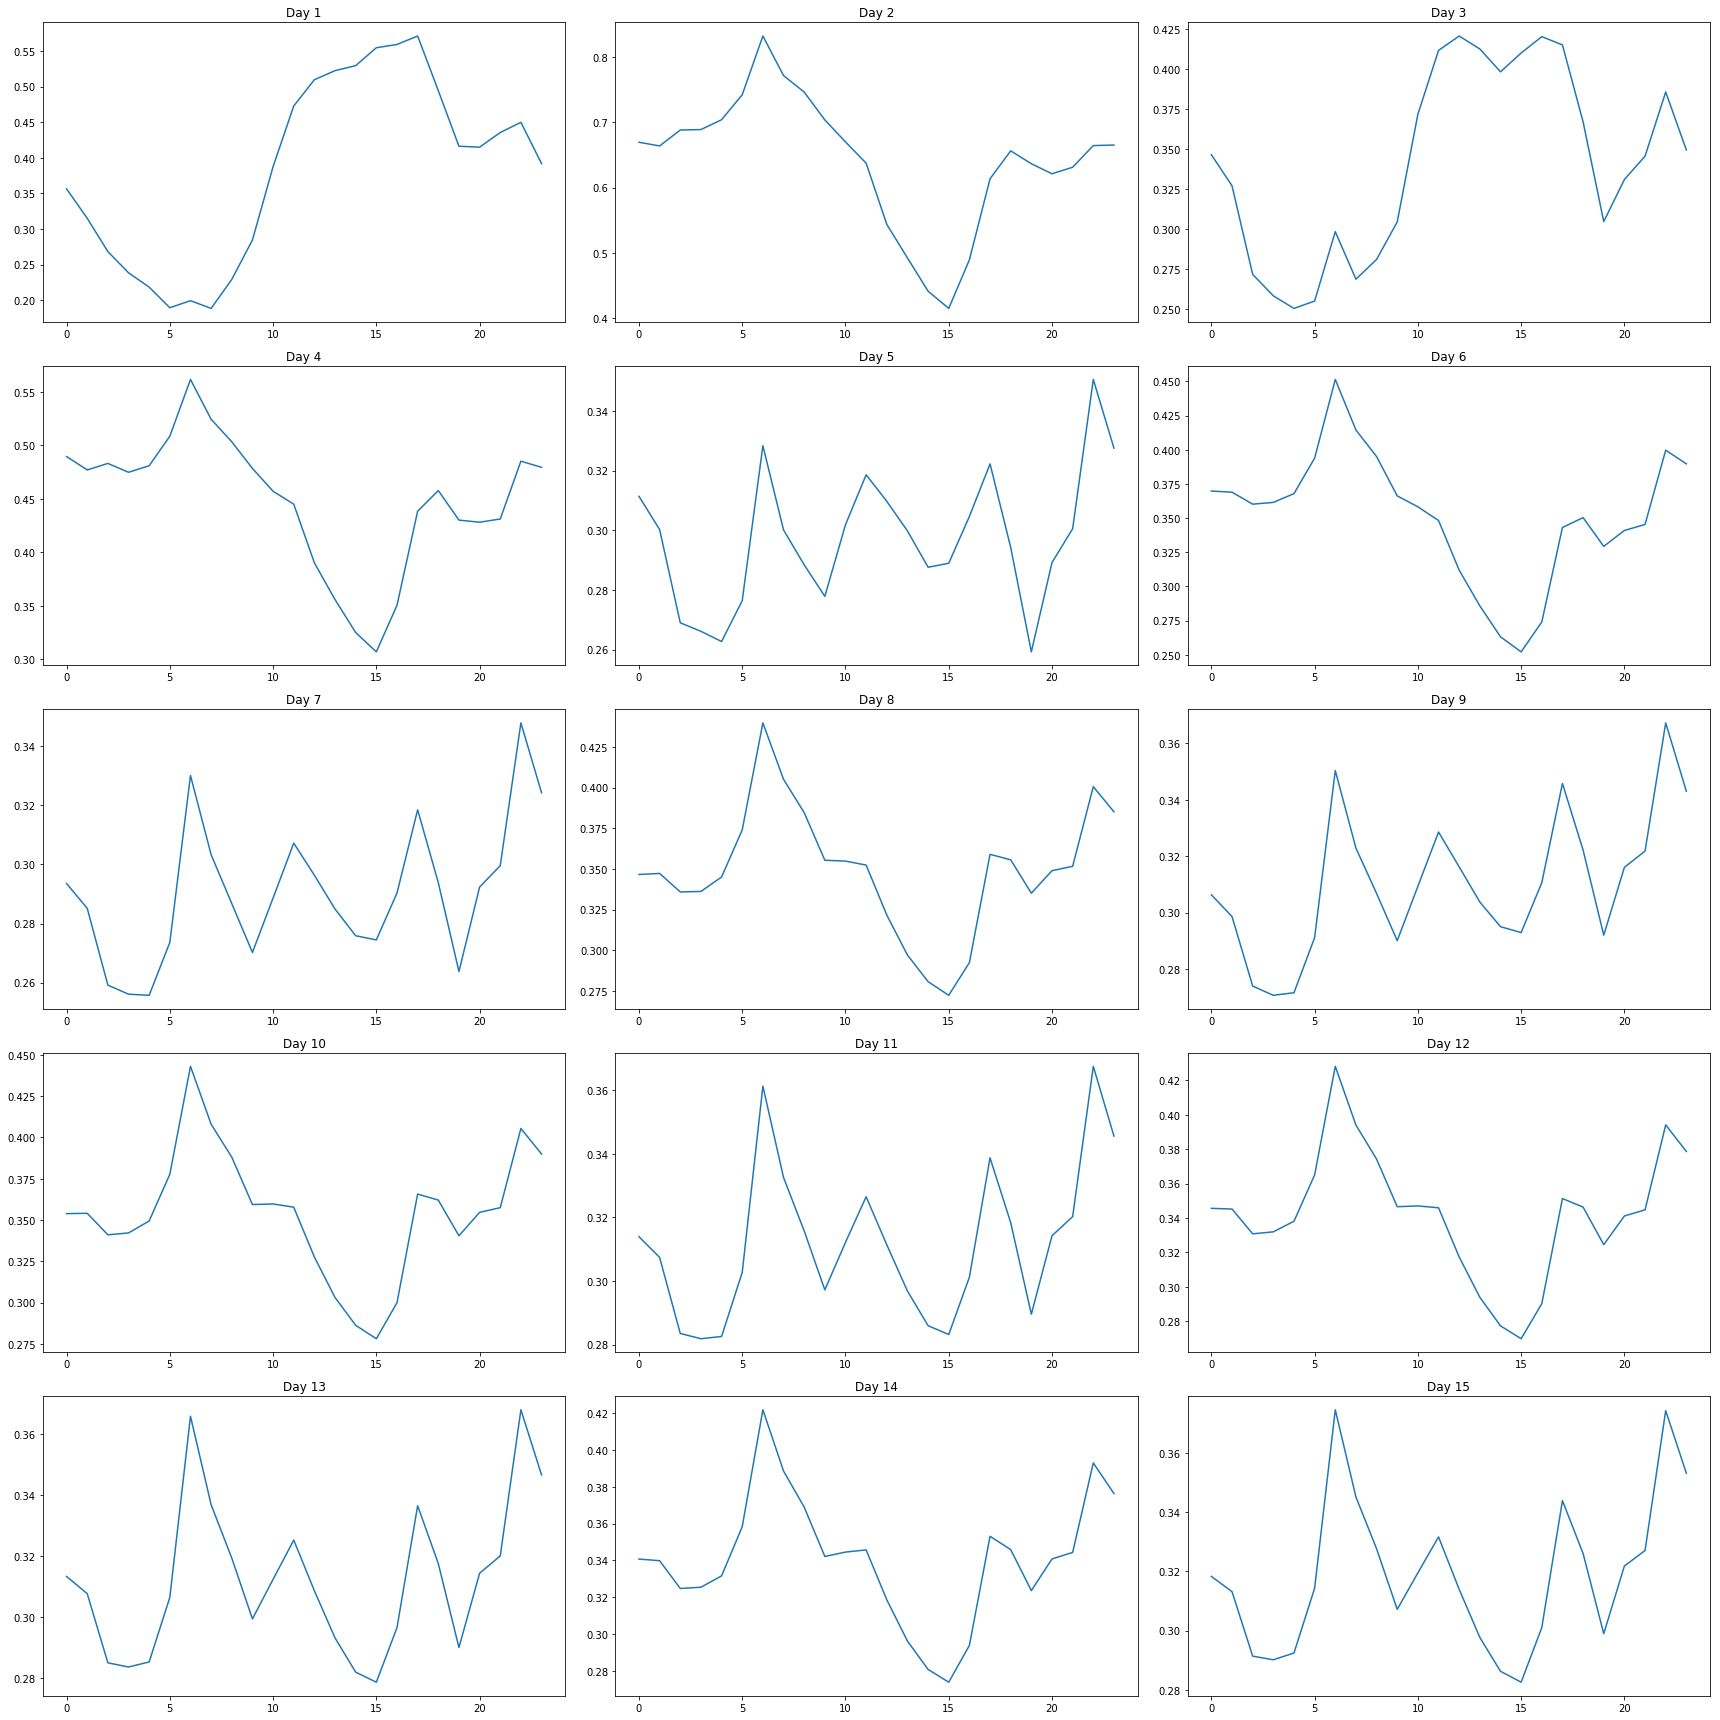

In [30]:
def get_per_hour_data(start_date = (2006, 1, 2), end_date =(2006, 3, 20)):
    #model.load_weights('model_weights/best_RNN_weights.hdf5')
    scaled_preprocessed_load_data_with_date = get_preprocessed_load_data_with_date(zone_id=3)
    if datetime(start_date[0], start_date[1], start_date[2]) > datetime.strptime(scaled_preprocessed_load_data_with_date.loc[scaled_preprocessed_load_data_with_date.index[-1]]['date'], "%Y-%m-%d"):
        input_data = X_test[-1]
        num_days = 15
    else:
        data = plot_data_between_dates(start_date, end_date)
        input_data = scaled_load_data.loc[data.index[0] - window_size + 1 - len(scaled_load_data.index): data.index[0] - len(scaled_load_data.index)]
        num_days = len(data.index) if len(data.index) < 15 else 15
    input_data = numpy.asarray(numpy.reshape(numpy.asarray(input_data), (1, window_size, 24)))
    outputs = predict_future(model, input_data, num_days)
    plot_future_prediction(outputs)
get_per_hour_data() 

## Temperature Analysis

In [ ]:
temperature_data = pandas.read_csv('data/temperature_history.csv')
display(temperature_data.head())
display(temperature_data.describe())
